<a href="https://colab.research.google.com/github/marilynle/DS-Unit-1-Build/blob/master/Storytelling_Project_1_Marilyn_Landim_Esko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import pandas_datareader.data as web
from pandas_datareader.data import DataReader
from pandas_datareader import wb # World Bank
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns


In [0]:
# World Economy: 10 years at a glance

In [0]:
# Gross domestic product (GDP)Total, US dollars/capita
url = "https://raw.githubusercontent.com/marilynle/DS-Unit-1-Build/master/gdp.csv"
gdp = pd.read_csv(url)
gdp.head(2)



,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,USD_CAP,A,1960,2409.195491,NaN
1,AUS,GDP,TOT,USD_CAP,A,1961,2379.705491,NaN


In [0]:
gdp = gdp.drop(columns=['INDICATOR', 'SUBJECT','MEASURE','FREQUENCY',"Flag Codes"])
gdp.head(2)


,LOCATION,TIME,Value
0,AUS,1960,2409.195491
1,AUS,1961,2379.705491


In [0]:
pd.options.display.float_format = '{:,.4f}'.format
gdp[gdp['TIME']== 2018].nlargest(10, 'Value')


,LOCATION,TIME,Value
815,LUX,2018,"113,136.7218"
619,IRL,2018,"83,081.1322"
1264,CHE,2018,"68,078.6689"
1012,NOR,2018,"65,514.7300"
1421,USA,2018,"62,852.6582"
570,ISL,2018,"57,453.3679"
914,NLD,2018,"56,325.6995"
107,AUT,2018,"55,513.2221"
287,DNK,2018,"55,137.8151"
58,AUS,2018,"54,144.1770"


In [0]:
gdp['LOCATION'].value_counts()


GBR      59
AUS      59
FRA      59
DNK      53
NLD      50
BEL      49
JPN      49
KOR      49
GRC      49
CAN      49
ISL      49
ESP      49
MEX      49
CHE      49
LUX      49
NZL      49
OECD     49
FIN      49
ITA      49
IRL      49
AUT      49
NOR      49
PRT      49
DEU      49
USA      49
SWE      49
TUR      49
CHN      38
COL      33
ZAF      33
CHL      33
CZE      29
POL      29
HUN      28
CRI      27
SVK      27
SAU      27
EST      26
IDN      25
SVN      24
BGR      24
LTU      24
ROU      24
LVA      24
MLT      24
EU28     24
CYP      24
EA19     24
ISR      24
OECDE    24
HRV      23
RUS      22
DEW      22
BRA      18
MKD      17
ARG      14
IND      13
ZMB      12
PER       8
Name: LOCATION, dtype: int64

In [0]:
gdp = gdp[(gdp.LOCATION != 'OECD')&(gdp.LOCATION != 'OECDE')&(gdp.LOCATION != 'EU28')&(gdp.LOCATION != 'EA19')]


In [0]:
gdp['LOCATION'].value_counts()


GBR    59
AUS    59
FRA    59
DNK    53
NLD    50
NZL    49
ESP    49
CAN    49
MEX    49
CHE    49
LUX    49
BEL    49
ITA    49
JPN    49
FIN    49
AUT    49
USA    49
SWE    49
KOR    49
GRC    49
IRL    49
DEU    49
NOR    49
TUR    49
PRT    49
ISL    49
CHN    38
ZAF    33
COL    33
CHL    33
POL    29
CZE    29
HUN    28
SAU    27
CRI    27
SVK    27
EST    26
IDN    25
SVN    24
MLT    24
BGR    24
LTU    24
ROU    24
CYP    24
ISR    24
LVA    24
HRV    23
RUS    22
DEW    22
BRA    18
MKD    17
ARG    14
IND    13
ZMB    12
PER     8
Name: LOCATION, dtype: int64

In [0]:
# Making a empty column for the feature "group"
gdp['group'] = ""
gdp.head(2)

,LOCATION,TIME,Value,group
0,AUS,1960,"2,409.1955",
1,AUS,1961,"2,379.7055",


In [0]:
AS = ['KOR','JPN','CHN','IDN','IND']
AM = ['BRA','ARG','PER','CHL','COL','USA','CAN','MEX','CRI']
ME = ['SAU','ISR']
AF = ['ZMB','ZAF']
OC=['AUS','NZL']
EU = ['GBR','FRA','DNK','NLD','FIN','NOR','BEL','ITA','SWE',
      'CHE','DEU','LUX','ISL','AUT','SVK','GRC','ROU','CYP','TUR',
      'LTU','BGR','LVA','SVN','HRV','IRL','ESP','EST','PRT','DEW',
      'MKD','RUS','CZE','POL','HUN','MLT']

In [0]:
def decide_group(location):
    if location in EU:
        return 'Europe'
      
    elif location in AS:
        return 'Asia'
      
    elif location in AM:
        return 'Americas'  
      
    elif location in ME:
        return 'Middle East'
    
    elif location in AF:
        return 'Africa'
      
    elif location in OC:
        return 'Oceania'  
      
    else:
        
        pass
    return ''

In [0]:
gdp['group'] = gdp['LOCATION'].apply(decide_group)
gdp.sample(10)

,LOCATION,TIME,Value,group
1320,GBR,1966,"2,834.5675",Europe
372,FRA,1995,"20,749.6029",Europe
1134,ESP,1986,"9,860.5291",Europe
1237,CHE,1991,"27,590.4289",Europe
1856,LTU,1997,"7,069.8026",Europe
97,AUT,2008,"41,316.0226",Europe
1995,HRV,1996,"9,177.6179",Europe
1872,LTU,2013,"26,679.9053",Europe
1169,SWE,1972,"5,442.5835",Europe
246,DNK,1977,"7,440.8341",Europe


In [0]:
current_year = 2018
df_gdp = (gdp[gdp['TIME'].eq(current_year)]
       .sort_values(by='Value', ascending=True)
       .head(10))
df_gdp


,LOCATION,TIME,Value,group
864,MEX,2018,"20,144.7450",Americas
1993,BGR,2018,"21,884.3805",Europe
1454,CHL,2018,"25,167.6483",Americas
2096,ROU,2018,"28,124.5065",Europe
1313,TUR,2018,"28,383.5720",Europe
493,GRC,2018,"29,592.4384",Europe
521,HUN,2018,"30,651.8089",Europe
1835,LVA,2018,"30,697.9388",Europe
1041,POL,2018,"30,982.1885",Europe
1090,PRT,2018,"33,408.8073",Europe


<BarContainer object of 10 artists>

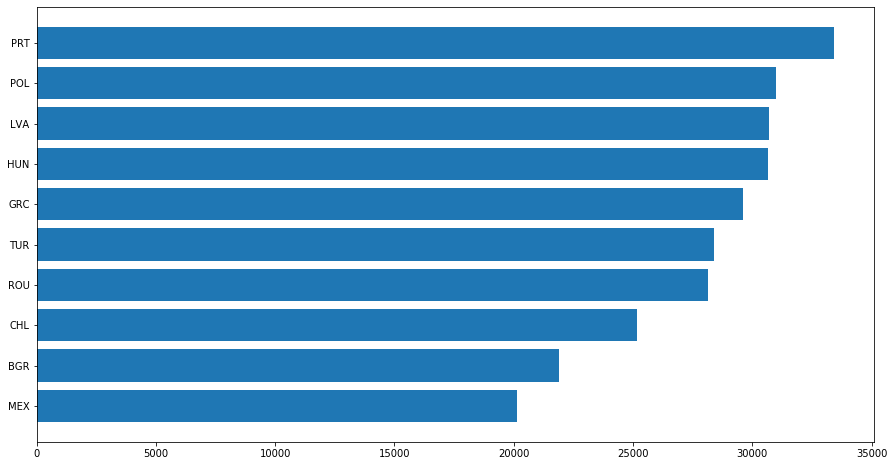

In [0]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df_gdp['LOCATION'], df_gdp['Value'])


In [0]:
# , '#eafb50', '#eef543'
colors = dict(zip(
    ['Europe', 'Asia', 'Americas',
     'Middle East', 'Africa', 'Oceania'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f']
))
group_lk = gdp.set_index('LOCATION')['group'].to_dict()


Text(1, 0.4, '2018')

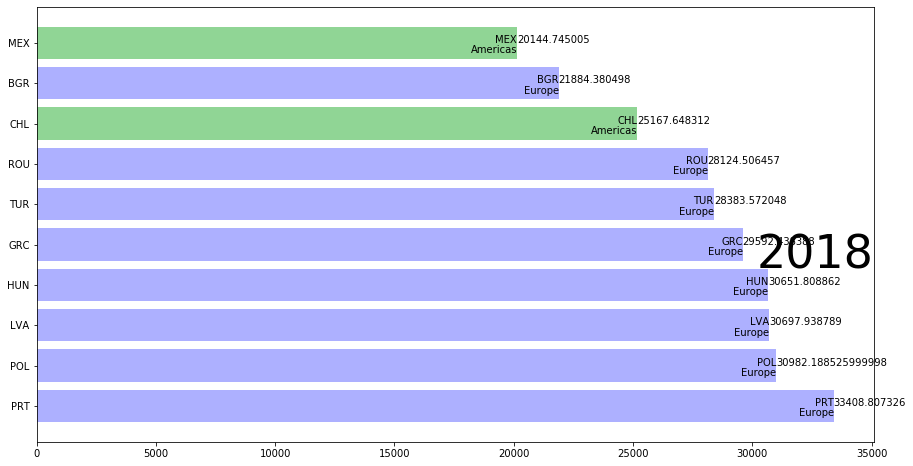

In [0]:
fig, ax = plt.subplots(figsize=(15, 8))
df_gdp = df_gdp[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(df_gdp['LOCATION'], df_gdp['Value'], color=[colors[group_lk[x]] for x in df_gdp['LOCATION']])
# 
for i, (Value, LOCATION) in enumerate(zip(df_gdp['Value'], df_gdp['LOCATION'])):
    ax.text(Value, i,     LOCATION,            ha='right')  # 
    ax.text(Value, i-.25, group_lk[LOCATION],  ha='right')  # 
    ax.text(Value, i,     Value,           ha='left')   # 
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')


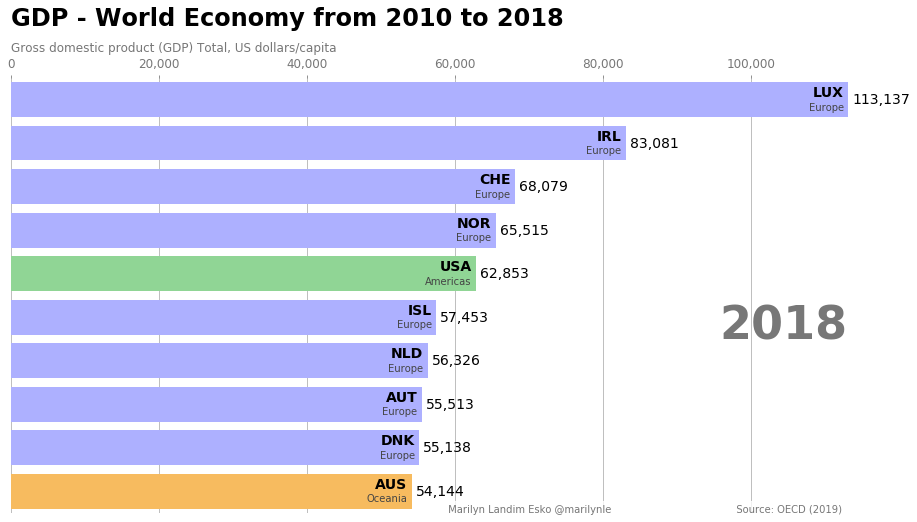

In [0]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(TIME):
    df_gdp = gdp[gdp['TIME'].eq(TIME)].sort_values(by='Value', ascending=True).tail(10)
    ax.clear()
    ax.barh(df_gdp['LOCATION'], df_gdp['Value'], color=[colors[group_lk[x]] for x in df_gdp['LOCATION']])
    dx = df_gdp['Value'].max() / 200
    for i, (Value, LOCATION) in enumerate(zip(df_gdp['Value'], df_gdp['LOCATION'])):
        ax.text(Value-dx, i,     LOCATION,           size=14, weight=600, ha='right', va='bottom')
        ax.text(Value-dx, i-.25, group_lk[LOCATION], size=10, color='#444444', ha='right', va='baseline')
        ax.text(Value+dx, i,     f'{Value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, TIME, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Gross domestic product (GDP) Total, US dollars/capita', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'GDP - World Economy from 2010 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    
    ax.text(1, 0, 
    s =' Marilyn Landim Esko @marilynle                                        Source: OECD (2019)  ', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)


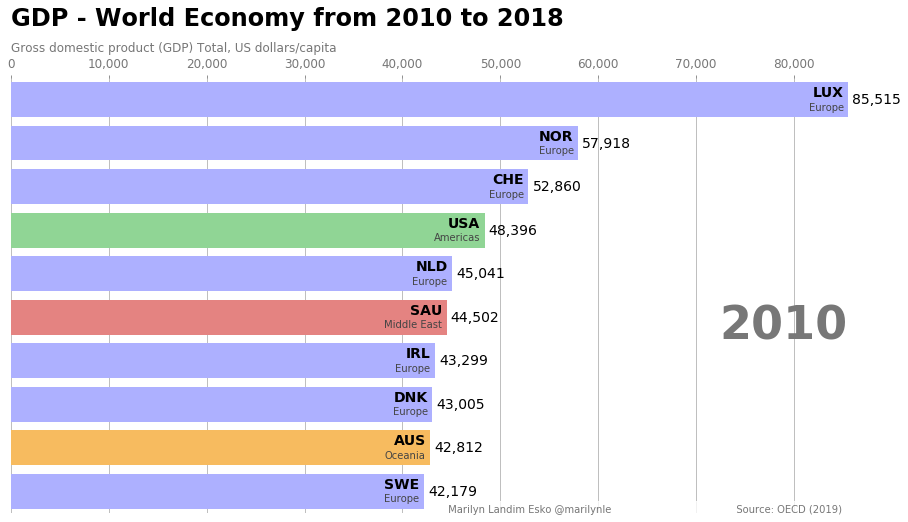

In [0]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2010, 2019))
HTML(animator.to_html5_video()) 
# HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()


In [0]:
# Inflation (CPI)
url = "https://raw.githubusercontent.com/marilynle/DS-Unit-1-Build/master/cpi.csv"
cpi = pd.read_csv(url)
cpi.head(2)


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,CPI,TOT,IDX2015,A,1949,3.7381,NaN
1,AUS,CPI,TOT,IDX2015,A,1950,4.0632,NaN


In [0]:
cpi = cpi.drop(columns=['INDICATOR', 'SUBJECT','MEASURE','FREQUENCY',"Flag Codes"])
cpi.head(2)


,LOCATION,TIME,Value
0,AUS,1949,3.7381
1,AUS,1950,4.0632


In [0]:
cpi = cpi[(cpi.LOCATION != 'OECD')&(cpi.LOCATION != 'OECDE')&(cpi.LOCATION != 'EU28')&(cpi.LOCATION != 'EA19')]

In [0]:
pd.options.display.float_format = '{:,.4f}'.format
cpi_2016 = cpi[cpi['TIME']== 2016].nlargest(10, 'Value')
cpi_2016


,LOCATION,TIME,Value
1756,BRA,2016,108.7391
1595,TUR,2016,107.7751
1874,COL,2016,107.5143
2167,RUS,2016,107.0424
2286,ZAF,2016,106.5946
1994,IND,2016,104.9410
1803,CHL,2016,103.7862
1231,NOR,2016,103.5500
2043,IDN,2016,103.5258
1011,MEX,2016,102.8217


In [0]:
pd.options.display.float_format = '{:,.4f}'.format
cpi[cpi['TIME']== 2013].nlargest(10, 'Value')


,LOCATION,TIME,Value
577,GRC,2013,103.1188
1530,CHE,2013,101.1705
1256,POL,2013,100.8276
2139,LTU,2013,100.7874
1406,ESP,2013,100.6548
1931,EST,2013,100.6016
1344,SVK,2013,100.4028
2223,SVN,2013,100.3292
614,HUN,2013,100.2899
1468,SWE,2013,100.2269


In [0]:
pd.options.display.float_format = '{:,.4f}'.format
cpi[cpi['TIME']== 2010].nlargest(10, 'Value')


,LOCATION,TIME,Value
1527,CHE,2010,101.8623
574,GRC,2010,99.2346
1465,SWE,2010,96.5299
830,JPN,2010,96.5250
706,IRL,2010,95.4980
450,FRA,2010,94.7150
2220,SVN,2010,94.3875
1403,ESP,2010,93.8862
2084,ISR,2010,93.7186
1315,PRT,2010,93.4207


In [0]:
# Employment rate
url = "https://raw.githubusercontent.com/marilynle/DS-Unit-1-Build/master/employment.csv"
employment = pd.read_csv(url)
employment.head(2)


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EMP,TOT,PC_WKGPOP,A,2010,72.3702,NaN
1,AUS,EMP,TOT,PC_WKGPOP,A,2011,72.6569,NaN


In [0]:
employment = employment.drop(columns=['INDICATOR', 'SUBJECT','MEASURE','FREQUENCY',"Flag Codes"])
employment.head(2)


,LOCATION,TIME,Value
0,AUS,2010,72.3702
1,AUS,2011,72.6569


In [0]:
employment = employment[(employment.LOCATION != 'OECD')&(employment.LOCATION != 'OECDE')&(employment.LOCATION != 'EU28')&(employment.LOCATION != 'EA19')]


In [0]:
pd.options.display.float_format = '{:,.4f}'.format
employment[employment['TIME']== 2010].nlargest(10, 'Value')


,LOCATION,TIME,Value
99,ISL,2010,78.1750
234,CHE,2010,77.3250
180,NOR,2010,75.3000
162,NLD,2010,73.9250
45,DNK,2010,73.3500
0,AUS,2010,72.3702
171,NZL,2010,72.2110
225,SWE,2010,72.1500
27,CAN,2010,71.4750
72,DEU,2010,71.2500


In [0]:
pd.options.display.float_format = '{:,.4f}'.format
employment[employment['TIME']== 2018].nlargest(10, 'Value')


,LOCATION,TIME,Value
107,ISL,2018,85.0750
242,CHE,2018,80.1000
233,SWE,2018,77.5250
179,NZL,2018,77.4788
170,NLD,2018,77.2000
134,JPN,2018,76.8894
80,DEU,2018,75.9000
53,DNK,2018,75.3750
44,CZE,2018,74.8250
188,NOR,2018,74.8000


In [0]:
# Unemployment rate
url = "https://raw.githubusercontent.com/marilynle/DS-Unit-1-Build/master/unrate.csv"
unrate = pd.read_csv(url)
unrate.head(2)


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,UNEMP,TOT,PC_LF,A,2010,5.2133,NaN
1,AUS,UNEMP,TOT,PC_LF,A,2011,5.0812,NaN


In [0]:
unrate = unrate.drop(columns=['INDICATOR', 'SUBJECT','MEASURE','FREQUENCY',"Flag Codes"])
unrate.head(2)


,LOCATION,TIME,Value
0,AUS,2010,5.2133
1,AUS,2011,5.0812


In [0]:
unrate = unrate[(unrate.LOCATION != 'OECD')&(unrate.LOCATION != 'OECDE')&(unrate.LOCATION != 'EU28')&(unrate.LOCATION != 'EA19')]

In [0]:
pd.options.display.float_format = '{:,.4f}'.format
unrate[unrate['TIME']== 2010].nlargest(10, 'Value')


,LOCATION,TIME,Value
326,ZAF,2010,24.8750
216,ESP,2010,19.8598
371,LVA,2010,19.4838
380,LTU,2010,17.8188
284,EST,2010,16.7026
108,IRL,2010,14.5323
207,SVK,2010,14.3810
81,GRC,2010,12.7172
362,COL,2010,11.8417
90,HUN,2010,11.1738


In [0]:
pd.options.display.float_format = '{:,.4f}'.format
unrate[unrate['TIME']== 2018].nlargest(10, 'Value')


,LOCATION,TIME,Value
334,ZAF,2018,27.1250
89,GRC,2018,19.2945
224,ESP,2018,15.2579
251,TUR,2018,10.8875
125,ITA,2018,10.6079
370,COL,2018,9.7192
71,FRA,2018,9.0592
379,LVA,2018,7.4153
62,FIN,2018,7.3574
206,PRT,2018,6.9941


In [0]:
# US Macroeconomic data
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 1, 1)
macro = web.DataReader(['A191RL1Q225SBEA', 'FPCPITOTLZGUSA','UNRATE','FEDFUNDS'], 'fred', start, end)
macro = macro.rename(columns={'A191RL1Q225SBEA': "GDP_%", 'FPCPITOTLZGUSA':'Inflation','UNRATE':'Unemployment','FEDFUNDS':'Federal_Funds'})
macro = macro.resample(rule='A').mean()
macro.head()


,GDP_%,Inflation,Unemployment,Federal_Funds
DATE,,,,
2010-12-31,2.5500,1.6400,9.6083,0.1750
2011-12-31,1.6250,3.1568,8.9333,0.1017
2012-12-31,1.4750,2.0693,8.0750,0.1400
2013-12-31,2.6250,1.4648,7.3583,0.1075
2014-12-31,2.9250,1.6222,6.1583,0.0892


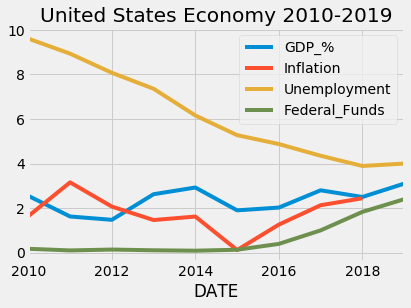

In [0]:
plt.style.use('fivethirtyeight')
macro.plot(title='United States Economy 2010-2019')
